In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import serial

In [61]:
# Create object serial port
portName = "COM5"                      # replace this port name by yours!
baudrate = 115200
ser = serial.Serial(portName,baudrate)


n = 1
y = np.zeros(0)

while n <= 11:
    value = ser.readline()
    y = np.append(y,float(value))
#     print(y)
    print(n)
    n+=1
print(y)    
print("end")


1
2
3
4
5
6
7
8
9
10
11
[351. 351. 351. 351. 351. 351. 355. 360. 362. 359. 362.]
end


In [63]:
print(n)
print(y)
x = np.linspace(0, n-2,n-1)
print(x)

ser.close()

12
[351. 351. 351. 351. 351. 351. 355. 360. 362. 359. 362.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [64]:
ser.close()

Text(0, 0.5, 'RRI(msec)')

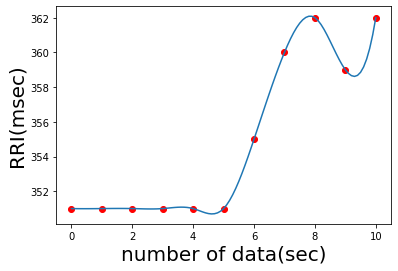

In [71]:
plt.plot(x, y, 'ro')
f = interpolate.interp1d(x, y, kind='cubic')
u = np.linspace(0, 10, num=101)
plt.plot(u, f(u),'-')
plt.xlabel("number of data(sec)", fontsize=20)
plt.ylabel("RRI(msec)", fontsize=20)

Text(0, 0.5, 'amplitude spectrum')

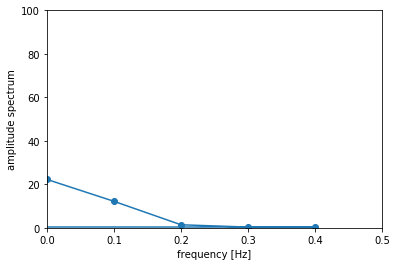

In [78]:
start = 0   # サンプリングする開始位置
N = 10     # FFTのサンプル数
fs = 1

hammingWindow = np.hamming(N)
windowedData = hammingWindow * x[start:start+N]
windowedDFT = np.fft.fft(windowedData)
freqList = np.fft.fftfreq(N, d=1.0/fs)
windowedAmp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in windowedDFT]
# 振幅スペクトルを描画（窓関数あり）
plt.plot(freqList, windowedAmp, marker='o', linestyle='-')
plt.axis([0, fs/2, 0, 100])
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude spectrum")